**Programmer:** python_scripts (Abhijith Warrier)

**PYTHON SCRIPT TO _EVALUATE HOW WELL PREDICTED PROBABILITIES MATCH ACTUAL OUTCOMES USING CALIBRATION CURVES_. 🧠📊📈**

This script demonstrates how to use **Calibration Curves (Reliability Diagrams)** to measure whether a model’s predicted probabilities reflect true likelihoods.

Calibration answers an important question:

> *When a model predicts 80% probability, does the event actually occur 80% of the time?*
>

---

## **📦 Import Required Libraries**

We’ll use scikit-learn utilities along with visualisation tools.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import calibration_curve

---

## **🧩 Load the Dataset**

In [2]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

---

## **✂️ Split Data into Train and Test Sets**

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

---

## **🤖 Train a Classification Model**

In [4]:
model = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)

model.fit(X_train, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


---

## **📊 Compute Calibration Curve**

We use predicted probabilities for the positive class.

In [5]:
y_probs = model.predict_proba(X_test)[:, 1]

prob_true, prob_pred = calibration_curve(
    y_test,
    y_probs,
    n_bins=10
)

---

## **📈 Plot the Calibration Curve**

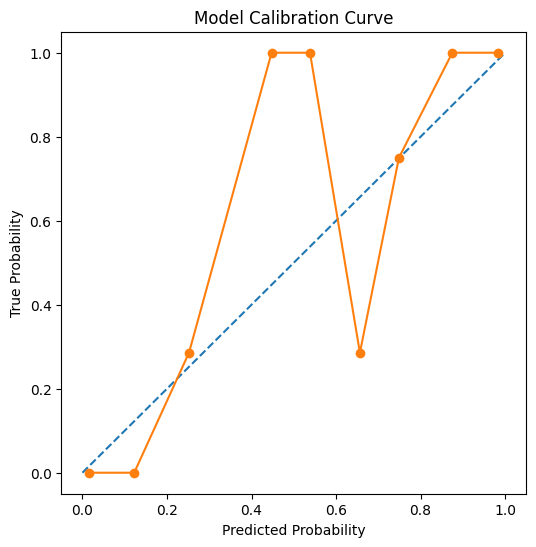

In [6]:
plt.figure(figsize=(6, 6))

# Perfect calibration line
plt.plot([0, 1], [0, 1], linestyle="--")

# Model calibration curve
plt.plot(prob_pred, prob_true, marker="o")

plt.xlabel("Predicted Probability")
plt.ylabel("True Probability")
plt.title("Model Calibration Curve")
plt.show()

---

## **🔍 How to Interpret the Curve**

- Curve close to diagonal → well calibrated
- Above diagonal → under-confident model
- Below diagonal → overconfident model

Calibration is critical in:

- Medical risk prediction
- Financial scoring
- Fraud detection
- Any probability-based decision system

---

## **🧠 Key Takeaways**

1. Calibration measures probability reliability.
2. High accuracy does not guarantee good calibration.
3. Overconfident models can be dangerous.
4. Calibration curves visualise prediction trustworthiness.
5. Essential for risk-sensitive ML applications.

---

## **Conclusion**

Model calibration curves help ensure that predicted probabilities truly reflect real-world outcomes. Even high-performing models may be poorly calibrated, making calibration analysis a crucial step in building trustworthy machine learning systems.

This completes another key topic in **AI with Python – Advanced Visualisation & Interpretability**.

---